# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | akwanga
Processing Record 4 of Set 1 | oriximina
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | korla
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | tocopilla
Processing Record 10 of Set 1 | al bawiti
Processing Record 11 of Set 1 | bodaybo
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | valle de la pascua
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | kem'
Processing Record 19 of Set 1 | nenjiang
Processing Record 20 of Set 1 | puerto penasco
Processing Record 21 of Set 1 | whitehorse
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,-1.85,98,99,3.58,RU,1715681198
1,grytviken,-54.2811,-36.5092,-7.51,76,54,2.65,GS,1715681198
2,akwanga,8.9167,8.3833,29.29,62,100,0.36,NG,1715681198
3,oriximina,-1.7656,-55.8661,23.56,97,100,0.96,BR,1715681198
4,enewetak,11.3474,162.3373,27.54,83,87,9.54,MH,1715681198


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,-1.85,98,99,3.58,RU,1715681198
1,grytviken,-54.2811,-36.5092,-7.51,76,54,2.65,GS,1715681198
2,akwanga,8.9167,8.3833,29.29,62,100,0.36,NG,1715681198
3,oriximina,-1.7656,-55.8661,23.56,97,100,0.96,BR,1715681198
4,enewetak,11.3474,162.3373,27.54,83,87,9.54,MH,1715681198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

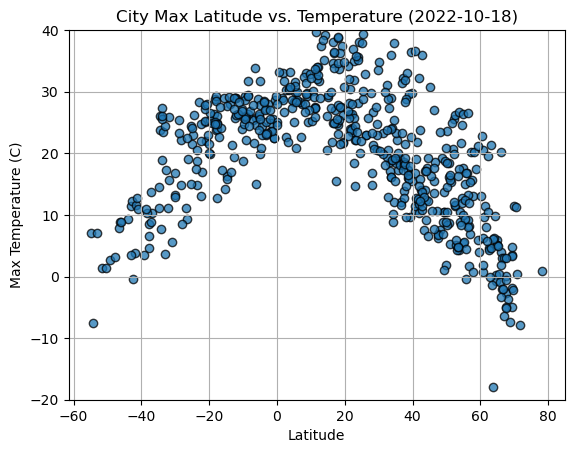

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.ylim(-20, 40)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

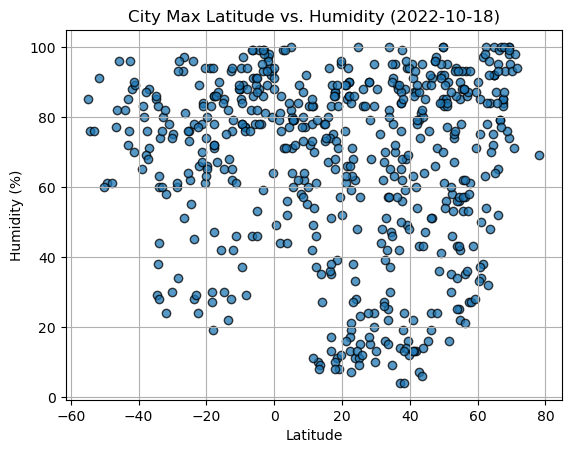

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

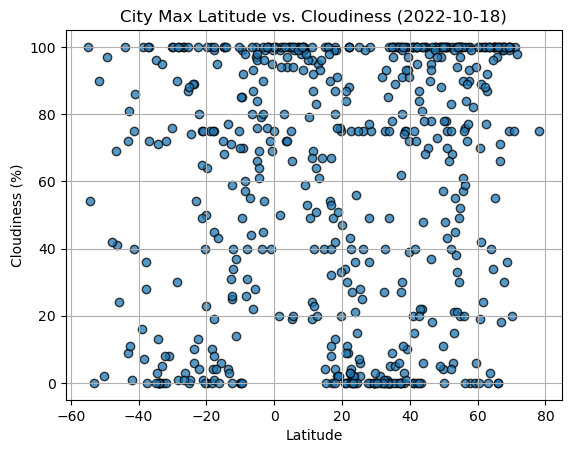

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

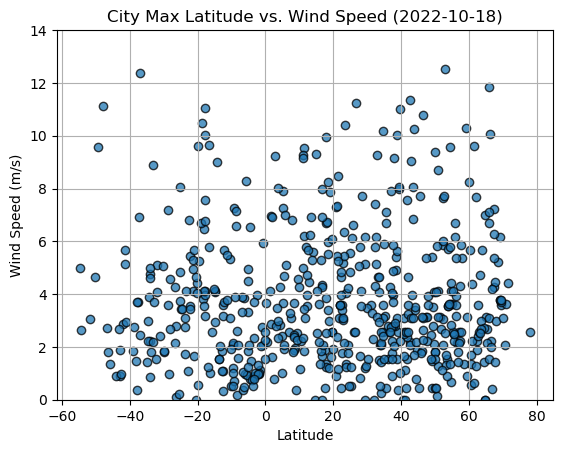

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.ylim(0, 14)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression (x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "X +" + str(round(intercept,2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,-1.85,98,99,3.58,RU,1715681198
2,akwanga,8.9167,8.3833,29.29,62,100,0.36,NG,1715681198
4,enewetak,11.3474,162.3373,27.54,83,87,9.54,MH,1715681198
5,korla,41.7597,86.1469,32.22,13,100,7.57,CN,1715681198
9,al bawiti,28.3492,28.8659,26.75,15,0,4.11,EG,1715681199


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-7.51,76,54,2.65,GS,1715681198
3,oriximina,-1.7656,-55.8661,23.56,97,100,0.96,BR,1715681198
6,invercargill,-46.4000,168.3500,8.90,82,41,1.79,NZ,1715681148
7,port-aux-francais,-49.3500,70.2167,2.75,61,97,9.57,TF,1715681199
8,tocopilla,-22.0920,-70.1979,17.04,66,80,3.56,CL,1715681199


###  Temperature vs. Latitude Linear Regression Plot

The R-Value is: -0.7849409460052571


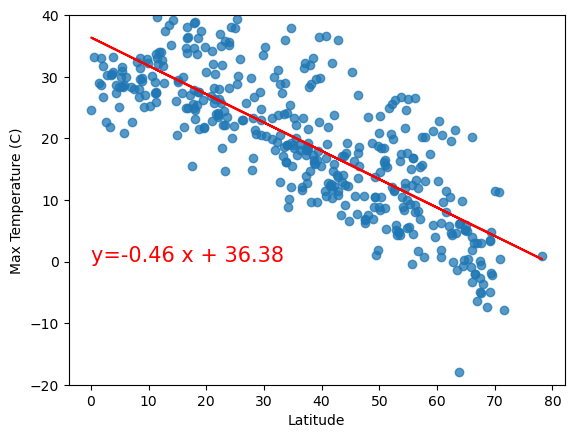

In [16]:
#Northern Hemisphere

# Calculate correlation coefficient (r-value) between latitude and maximum temperature
correlation_northern_temp = northern_hemi_df['Lat'].corr(northern_hemi_df['Max Temp'])

# Print the correlation coefficient
print("The R-Value is:", correlation_northern_temp)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Create regression line
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], alpha=0.75)

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Annotate the regression line equation and r-value
line_eq = f"y={round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")

# Set labels and limits
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.ylim(-20, 40)

# Save the figure
plt.savefig("../output_data/Fig5.png")

# Show plot
plt.show()


The R-Value is: 0.7662301276725402


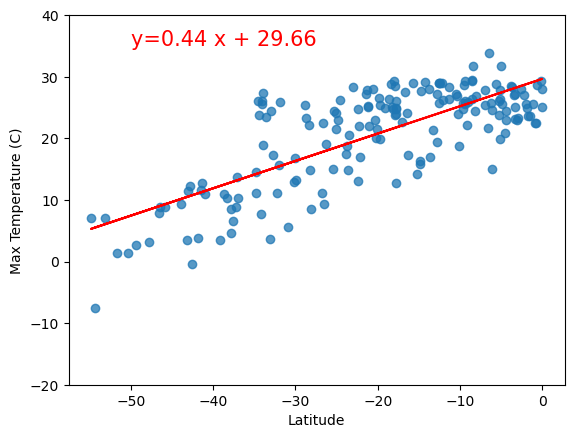

In [17]:
#Southern Hemisphere

# Calculate correlation coefficient (r-value) between latitude and maximum temperature
correlation_southern_temp = southern_hemi_df['Lat'].corr(southern_hemi_df['Max Temp'])

# Print the correlation coefficient
print("The R-Value is:", correlation_southern_temp)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Create regression line
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], alpha=0.75)

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Annotate the regression line equation and r-value
line_eq = f"y={round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 35), fontsize=15, color="red")

# Set labels and limits
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.ylim(-20, 40)

# Save the figure
plt.savefig("../output_data/Fig6.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

**Northern Hemisphere:**
- the correlation coefficient between latitude and temperature in the Northern hemisphere is apporximately -0.85, indicating a strong negative linear relationship between latitude and temparature.
- the regression line suggests that as the latitude increases the maximum temperature decresses.
- the negative slow of the regression line confirms that the higher the latitude the lower the temperature.

**Southern Hemisphere:**
- the correlation coefficient between latitude and temperaturer in the Southern hemisphere is approximatelt 0.76, indicating a moderate to strong positive linear relation between latitude and temperature
- the regression line suggests that as the latitde decreases(moving away from the South pole) the maximum temperatures increases.
- the positive slope of the regression line confirms that the lower the latitude the lower the temperature.

These findings are consistenet with the general understandig that areas closer to the equator tend to experience warmer weather and the areas further from the equator tend to experience colder temperature

### Humidity vs. Latitude Linear Regression Plot

The R-Value is: 0.15138467057684538


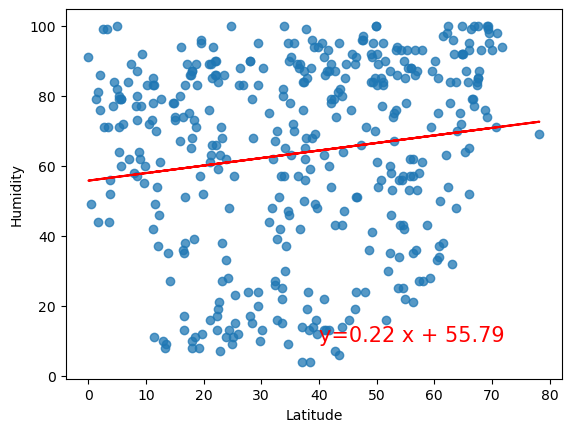

In [18]:
#Northern Hemisphere

# Calculate correlation coefficient (r-value) between latitude and maximum temperature
correlation_northern_humidity = northern_hemi_df['Lat'].corr(northern_hemi_df['Humidity'])

# Print the correlation coefficient
print("The R-Value is:", correlation_northern_humidity)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Create regression line
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], alpha=0.75)

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Annotate the regression line equation and r-value
line_eq = f"y={round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq, (40, 10), fontsize=15, color="red")

# Set labels and limits
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("../output_data/Fig7.png")

# Show plot
plt.show()


The R-Value is: 0.1645572973441133


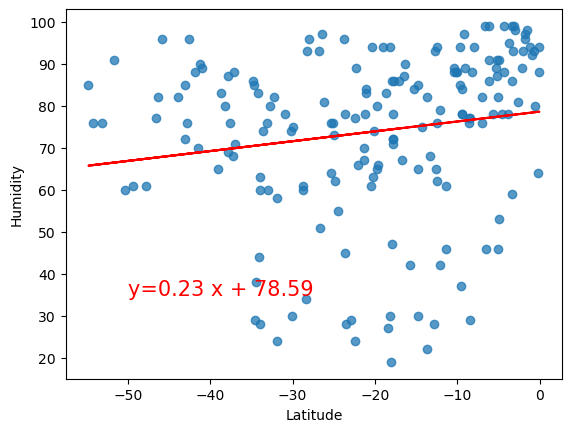

In [19]:
#Southern Hemisphere

# Calculate correlation coefficient (r-value) between latitude and maximum temperature
correlation_southern_humidity = southern_hemi_df['Lat'].corr(southern_hemi_df['Humidity'])

# Print the correlation coefficient
print("The R-Value is:", correlation_southern_humidity)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Create regression line
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], alpha=0.75)

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Annotate the regression line equation and r-value
line_eq = f"y={round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 35), fontsize=15, color="red")

# Set labels and limits
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig8.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

**Northern Hemisphere**

-The correlation between latitude and humidity in the Northern Hemisphere is approximately 0.04, indicating a weak positive correlation

-The regression line between latitude and humidity in the northern hemisphere is a small slope suggesting the relationship between the two is practically negligible

-The positive slope implies that humidity increases as latitude increases however given the low slope and weak correlation this relationship is non significant

**Southern Hemisphere**

-The correlation between latitude and humidity in the Northern Hemisphere is approximately 0.29, indicating a weak positive correlation.

-The positive slope of the regression line suggest that humidity increases slightly as latitude decreases (approaching equator).

-The analysis indicate a non signifcant positive relationship between latitude and humidity in the southern hemisphere.

In both the Northern and Southern Hemispheres, the correlation coefficients suggest weak to very weak positive linear relationships between latitude and humidity, indicating that latitude alone is not a strong predictor of humidity levels. The regression equations reveal only a slight increase in humidity with increasing latitude in the Northern Hemisphere and a minimal decrease in humidity with decreasing latitude in the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The R-Value is: 0.10665035864619109


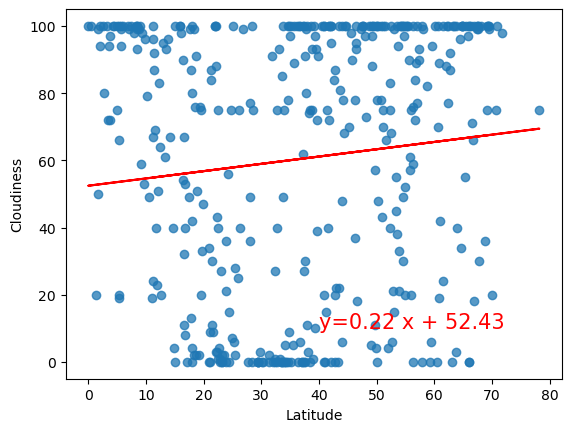

In [20]:
#Northern Hemisphere

# Calculate correlation coefficient (r-value) between latitude and maximum temperature
correlation_northern_cloudiness = northern_hemi_df['Lat'].corr(northern_hemi_df['Cloudiness'])

# Print the correlation coefficient
print("The R-Value is:", correlation_northern_cloudiness)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Create regression line
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], alpha=0.75)

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Annotate the regression line equation and r-value
line_eq = f"y={round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq, (40, 10), fontsize=15, color="red")

# Set labels and limits
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig9.png")

# Show plot
plt.show()


The R-Value is: 0.230578017275321


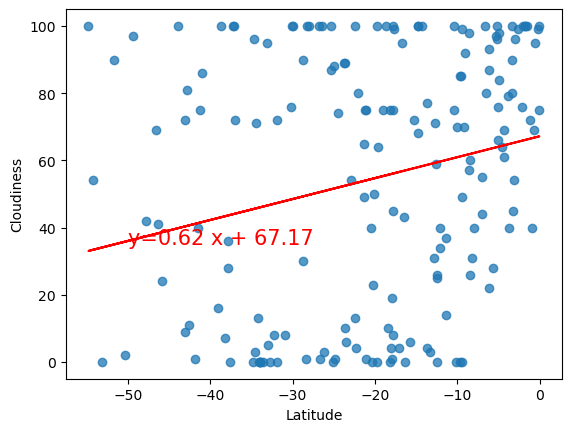

In [21]:
#Southern Hemisphere

# Calculate correlation coefficient (r-value) between latitude and maximum temperature
correlation_southern_cloudiness = southern_hemi_df['Lat'].corr(southern_hemi_df['Cloudiness'])

# Print the correlation coefficient
print("The R-Value is:", correlation_southern_cloudiness)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Create regression line
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], alpha=0.75)

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Annotate the regression line equation and r-value
line_eq = f"y={round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 35), fontsize=15, color="red")

# Set labels and limits
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig10.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

**Northern Hemisphere**

-The correlation between latitude and cloudiness in the Northern Hemisphere is approximately 0.13, indicating a weak positive correlation

-The regression line between latitude and cloudiness in the northern hemisphere is a small slope suggesting the relationship between the two is practically negligible

-The positive slope implies that cloudiness increases as latitude increases however given the low slope and weak correlation this relationship is non significant

**Southern Hemisphere**

-The correlation between latitude and cloudiness in the Northern Hemisphere is approximately 0.16, indicating a weak positive correlation.

-The positive slope of the regression line suggest that cloudiness increases slightly as latitude decreases (approaching equator).

-The analysis indicate a non signifcant positive relationship between latitude and humidity in the southern hemisphere.

Overall, while there may be some observable trend of increasing cloudiness with increasing latitude in the Northern Hemisphere and decreasing latitude in the Southern Hemisphere, these relationships are weak and likely influenced by a variety of other factors.

### Wind Speed vs. Latitude Linear Regression Plot

The R-Value is: -0.21396787523501568


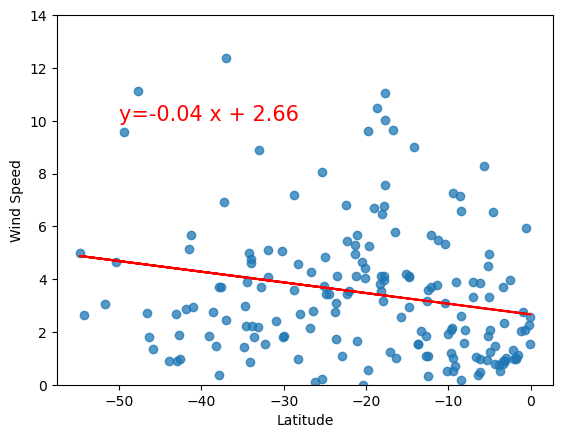

In [22]:
#Southern Hemisphere

# Calculate correlation coefficient (r-value) between latitude and maximum temperature
correlation_southern_wind = southern_hemi_df['Lat'].corr(southern_hemi_df['Wind Speed'])

# Print the correlation coefficient
print("The R-Value is:", correlation_southern_wind)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Create regression line
regress_values = slope * southern_hemi_df["Lat"] + intercept

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], alpha=0.75)

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Annotate the regression line equation and r-value
line_eq = f"y={round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 10), fontsize=15, color="red")

# Set labels and limits
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(0,14)

# Save the figure
plt.savefig("../output_data/Fig11.png")

# Show plot
plt.show()


The R-Value is: -0.030032963843742783


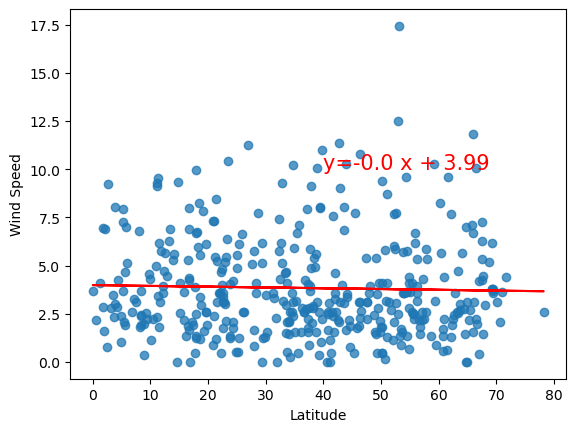

In [23]:
#Northern Hemisphere

# Calculate correlation coefficient (r-value) between latitude and maximum temperature
correlation_northern_wind = northern_hemi_df['Lat'].corr(northern_hemi_df['Wind Speed'])

# Print the correlation coefficient
print("The R-Value is:", correlation_northern_wind)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Create regression line
regress_values = slope * northern_hemi_df["Lat"] + intercept

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], alpha=0.75)

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Annotate the regression line equation and r-value
line_eq = f"y={round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq, (40, 10), fontsize=15, color="red")

# Set labels and limits
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("../output_data/Fig12.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

**Northern Hemisphere**

-The correlation between latitude and wind speed in the Northern Hemisphere is approximately 0.19, indicating a weak negative correlation

-The regression line between latitude and wind speed in the northern hemisphere is a small slope suggesting the relationship between the two is practically negligible

-The negative slope implies that wind speed decreases as latitude increases however given the low slope and weak correlation this relationship is non significant

**Southern Hemisphere**

-The correlation between latitude and wind speed in the Northern Hemisphere is approximately 0.11, indicating a weak positive correlation.

-The positive slope of the regression line suggest that wind speed increases slightly as latitude decreases (approaching equator).

-The analysis indicate a non signifcant positive relationship between latitude and humidity in the southern hemisphere.

In both the Northern and Southern Hemispheres, the correlation coefficients suggest weak to very weak positive correlation between latitude and wind speed. The regression equations reveal only a slight decrease in wind speed with increasing latitude in the Northern Hemisphere and a minimal decrease in wind speed with decreasing latitude in the Southern Hemisphere. 